# Basic Example:

This is just a quick example of plotting a number of BigWig files using the package API

### Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotnado.api as pn

## Define the BigWig files that we want to plot

**Note**: The BigWig files are not included in the dataset, as it is possible to just use remote URLs to plot the data I'm going to use data stored on the CCB Oxford HPC.

To make life easier I'm going to make a dictionary of the BigWig files that I want to plot. You could just add these one by one to the plot if you wanted to.

In [2]:
bigwigs = {
    'MV4;11 0nM EPZ H3K79me2': 'https://userweb.molbiol.ox.ac.uk/public/project/milne_group/cchahrou/orlando_chip/hg38_dm6/MV4110nMH3K79me2_bigWig.bigWig',
    'MV4;11 0.5nM EPZ H3K79me2': 'https://userweb.molbiol.ox.ac.uk/public/project/milne_group/cchahrou/orlando_chip/hg38_dm6/MV41105nMH3K79me2_bigWig.bigWig',
    'MV4;11 2nM EPZ H3K79me2': 'https://userweb.molbiol.ox.ac.uk/public/project/milne_group/cchahrou/orlando_chip/hg38_dm6/MV4112nMH3K79me2_bigWig.bigWig',
    'MV4;11 5nM EPZ H3K79me2': 'https://userweb.molbiol.ox.ac.uk/public/project/milne_group/cchahrou/orlando_chip/hg38_dm6/MV4115nMH3K79me2_bigWig.bigWig',
}

# Generate the plot

I'm going to make a basic plot with:

* scale bar
* gene annotations
* 4 x BigWig files
* X-axis showing the chromosome coordinates

In [23]:
figure = pn.Figure(autocolor=True, autospacing=True) # Create a figure instance, autocolor and autospacing are optional arguments but make the figure look nicer
figure.add_track('scale') # Add a scale track
figure.add_track('genes', genome='hg38', gene_style='normal', min_gene_length=1e5, height=0.5) # Add a gene track, this can specify a file in bed12 format or can be any supported genome name

# Loop over the bigwigs and add them to the figure
for name, url in bigwigs.items():
    figure.add_track('bigwig', # Track type 
                     file=url, # File or URL to the bigwig file 
                     title=name, # Title of the track 
                     autoscale_group='H3K79me2', # (Optional) Autoscale group to scale the tracks together,
                     min_value=0, # (Optional) Minimum value for the track
                     )

figure.add_track('xaxis') # Add an x-axis track

# Display the plot

You've got multiple options for displaying the plot:

* Display it in a Jupyter notebook
* Save it to a file
* Save it as a template for later use or plotting using the CLI

## Define the region to plot

There are two ways to define the region to plot:

1. Use a set of genomic coordinates
1. Use a gene name (this must be from a genome that is supported by the package)

In [20]:
region_to_plot = 'chr9:77,620,642-78,119,542' # Define the region to plot, this is a region around the GNAQ gene
gene_to_plot = 'GNAQ' # Define the gene to plot, this is the GNAQ gene

### Perform the plotting

### By Region

[W::hts_idx_load3] The index file is older than the data file: /ceph/project/milne_group/asmith/software/mambaforge/envs/plotnado/lib/python3.12/site-packages/plotnado/data/gene_bed_files/hg38_genes.bed.bgz.tbi
2024-05-29 18:38:58.094 | DEBUG    | plotnado.api.genes:plot_genes:174 - ylim 100,0


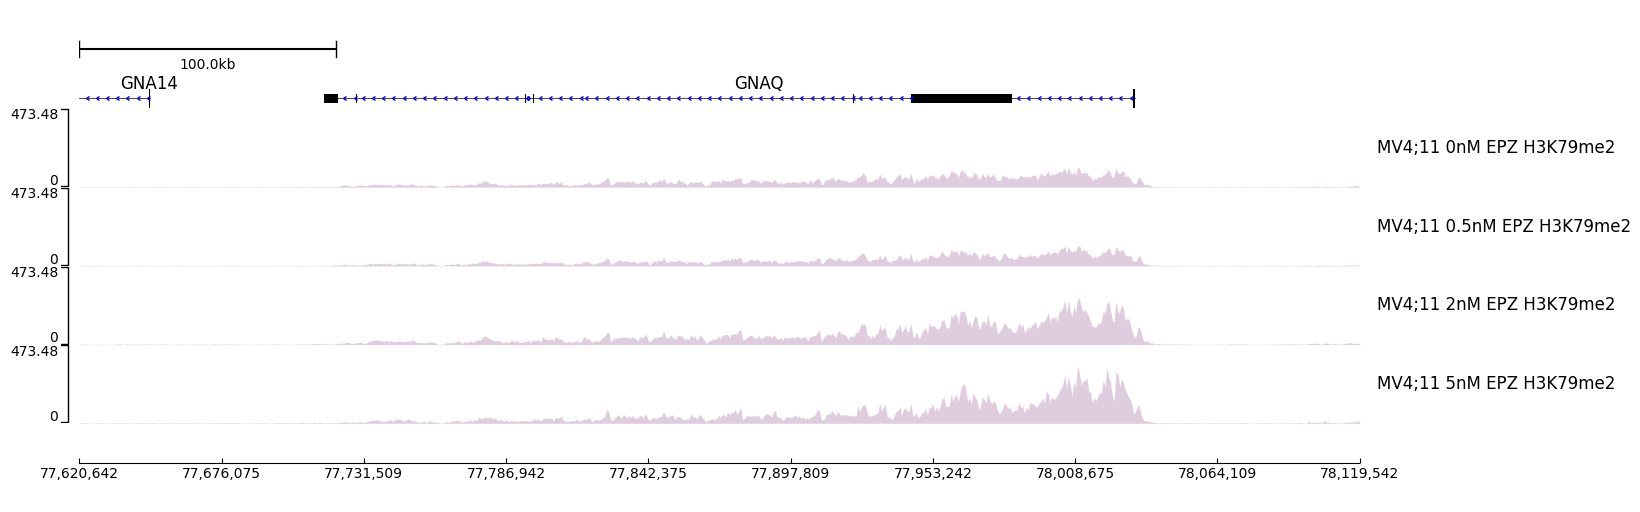

In [21]:
figure.plot(region_to_plot) # Plot the region

### By Gene

[W::hts_idx_load3] The index file is older than the data file: /ceph/project/milne_group/asmith/software/mambaforge/envs/plotnado/lib/python3.12/site-packages/plotnado/data/gene_bed_files/hg38_genes.bed.bgz.tbi
2024-05-29 18:38:59.966 | DEBUG    | plotnado.api.genes:plot_genes:174 - ylim 100,0


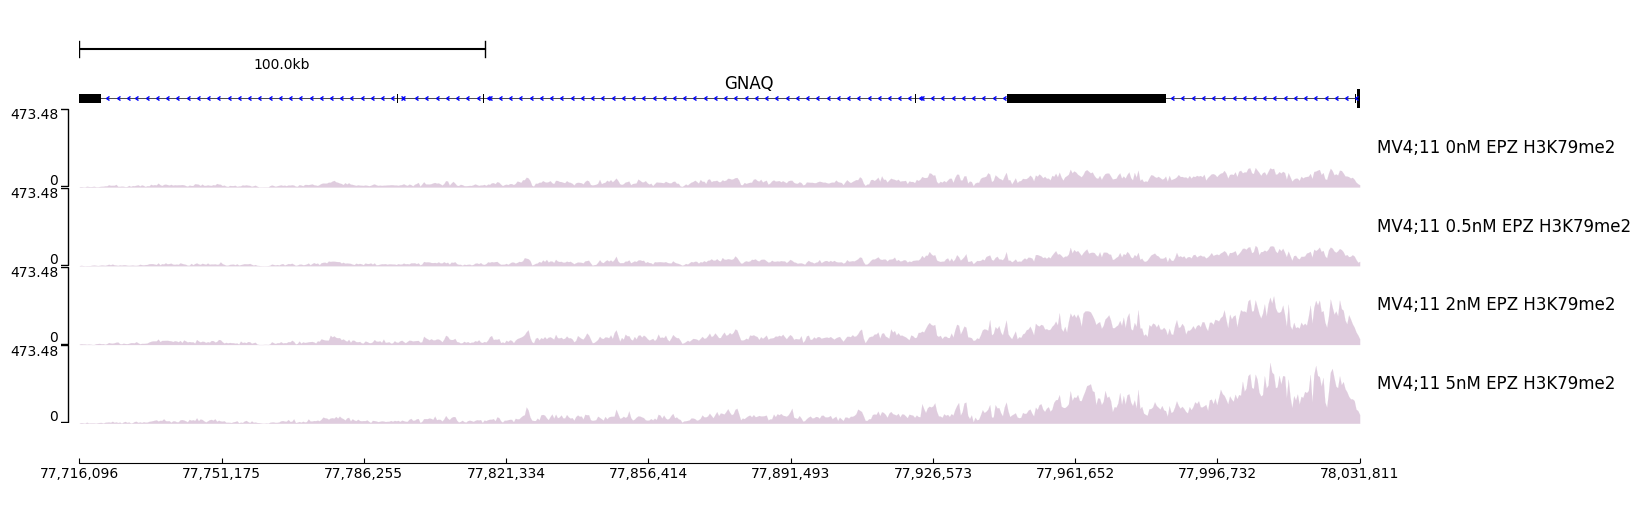

In [22]:
figure.plot_gene('GNAQ', genome='hg38') # Plot the gene